In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
print(sklearn.__version__)

1.5.1


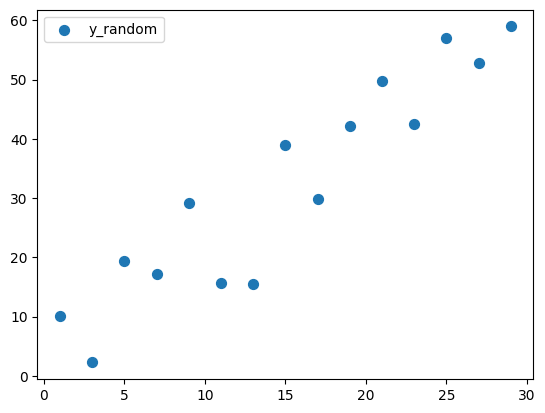

In [56]:
np.random.seed(910)
x = np.arange(1, 30, 2)
y = 2*x + 1
y_random = y + np.random.normal(0, 8, len(y))

# plt.scatter(x,y,s = 50, label = "y")
plt.scatter(x,y_random,s = 50, label = "y_random")
plt.legend()
plt.show()

#OLS 최소제곱 추적량 

In [57]:
x_mean = np.mean(x)
y_mean = np.mean(y_random)
sxy = sum((x - x_mean) * (y_random - y_mean))
sxx = sum((x - x_mean)**2)
b1 = sxy/sxx
b0 = y_mean - b1*x_mean
print("b1 = ", b1.round(3))
print("b0 = ", b0.round(3))

b1 =  1.901
b0 =  3.566


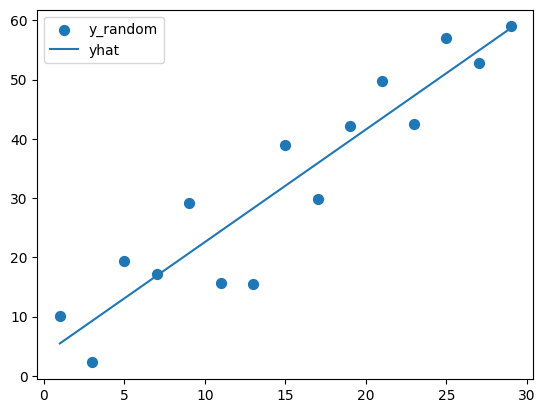

In [65]:
yhat = b1*x + b0
# plt.scatter(x,y,s = 50, label = "y")
plt.scatter(x,y_random,s = 50, label = "y_random")
plt.plot(x,yhat, label = "yhat")
plt.legend()
plt.show()

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
x_2d = x.reshape(-1, 1) 

In [88]:
## calss instance
lr = LinearRegression()
lr.fit(x_2d, y_random)

LinearRegression()

In [89]:
print("coeff = ", lr.coef_)
print("intercept = ", lr.intercept_)
lr.score(x_2d, y_random)

coeff =  [1.90073609]
intercept =  3.566406385768893


0.8679805034799591

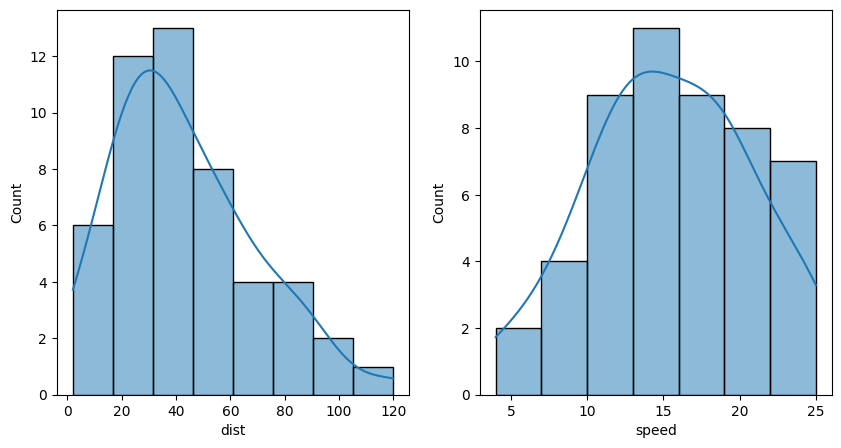

<Axes: ylabel='dist'>

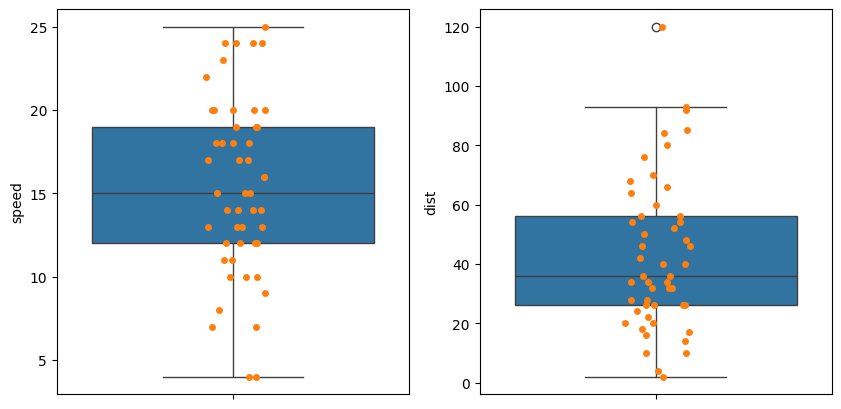

In [140]:
import os

fpath = "C:/Users/KTJ/Desktop/01_Data_handling/dataset"
fname = "cars.csv"
full_path = os.path.join(fpath, fname)
cars_df = pd.read_csv(full_path)
cars.head()

fig, axs = plt.subplots(1,2,figsize = (10, 5))
sns.histplot(cars_df, x = "dist", ax = axs[0], kde = True)
sns.histplot(cars_df, x = "speed", ax = axs[1], kde = True)
plt.show()

fig, axs = plt.subplots(1, 2, figsize = (10, 5))
sns.boxplot(cars_df, y = "speed", ax = axs[0])
sns.stripplot(cars_df, y = "speed", ax = axs[0])
sns.boxplot(cars_df, y = "dist", ax = axs[1])
sns.stripplot(cars_df, y = "dist", ax = axs[1])



In [147]:
x = cars_df[['speed']]
y = cars_df['dist']
lr = LinearRegression()


In [148]:
lr.fit(x, y)
print("score = ", round(lr.score(x, y), 3))

score =  0.651


In [149]:
print("coef(기울기) = ", lr.coef_)
print("intercept(절편) = ", lr.intercept_)


coef(기울기) =  [3.93240876]
intercept(절편) =  -17.579094890510973


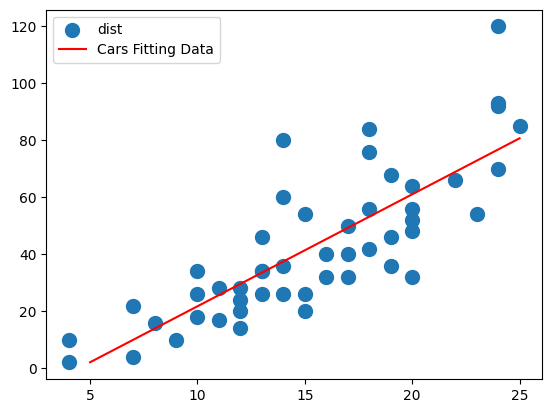

In [150]:
x_line = np.linspace(5, 25, 10)

plt.scatter(x = "speed", y = "dist", data = cars_df, s = 100)
plt.plot(x_line, 3.932*x_line - 17.579, color = 'red', label = "Cars Fitting Data")
plt.legend()
plt.show()

In [156]:
mtcars = pd.read_excel("../dataset/mtcars.xlsx")
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


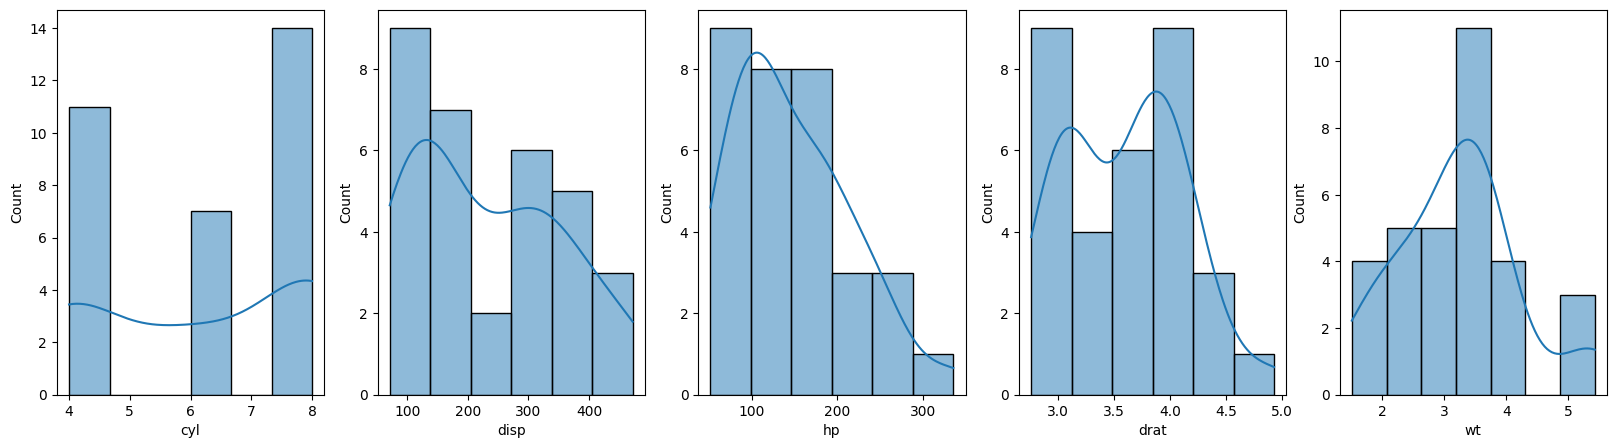

In [233]:
fig, axs = plt.subplots(1,5, figsize = (20, 5))
sns.histplot(mtcars, x = "cyl", ax = axs[0], kde = True)
sns.histplot(mtcars, x = "disp", ax = axs[1], kde = True)
sns.histplot(mtcars, x = "hp", ax = axs[2], kde = True)
sns.histplot(mtcars, x = "drat", ax = axs[3], kde = True)
sns.histplot(mtcars, x = "wt", ax = axs[4], kde = True)
plt.show()

In [190]:
x = mtcars[["cyl", "disp", "hp", "drat", "wt"]]
y = mtcars["mpg"]

In [236]:
lr = LinearRegression()
lr.fit(x,y)
print("score = ", lr.score(x, y))

score =  0.8513151800973331


In [206]:
print("coef = ", lr.coef_)
print("intercepter = ", lr.intercept_)

y_pred = lr.predict(x)


coef =  [-1.1074865   0.01235733 -0.02401743  0.95220742 -3.67328708]
intercepter =  36.00835689091306


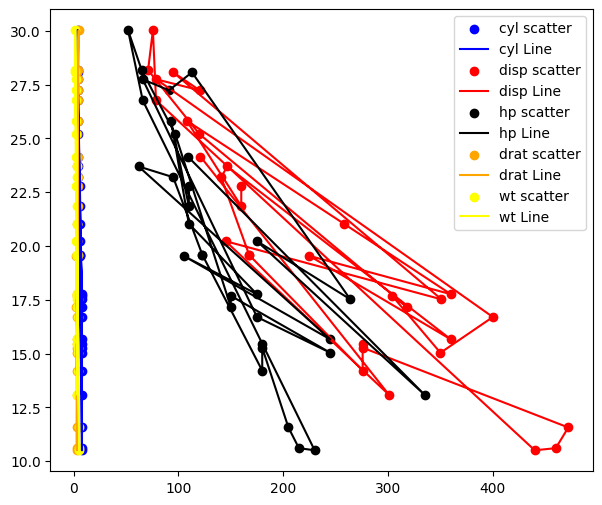

In [229]:
variables = ['cyl', 'disp', 'hp', 'drat', 'wt']
colors = ['blue', 'red', 'black', 'orange', 'yellow']

plt.figure(figsize=(7,6))

for i, val in enumerate(variables):
    color = colors[i]
    plt.scatter(x[val], y_pred, color=color, label=f'{val} scatter')
    plt.plot(x[val], y_pred, color=color, label=f'{val} Line')
plt.legend()
plt.show()